In [1]:
!pip install opencv-python mediapipe

In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

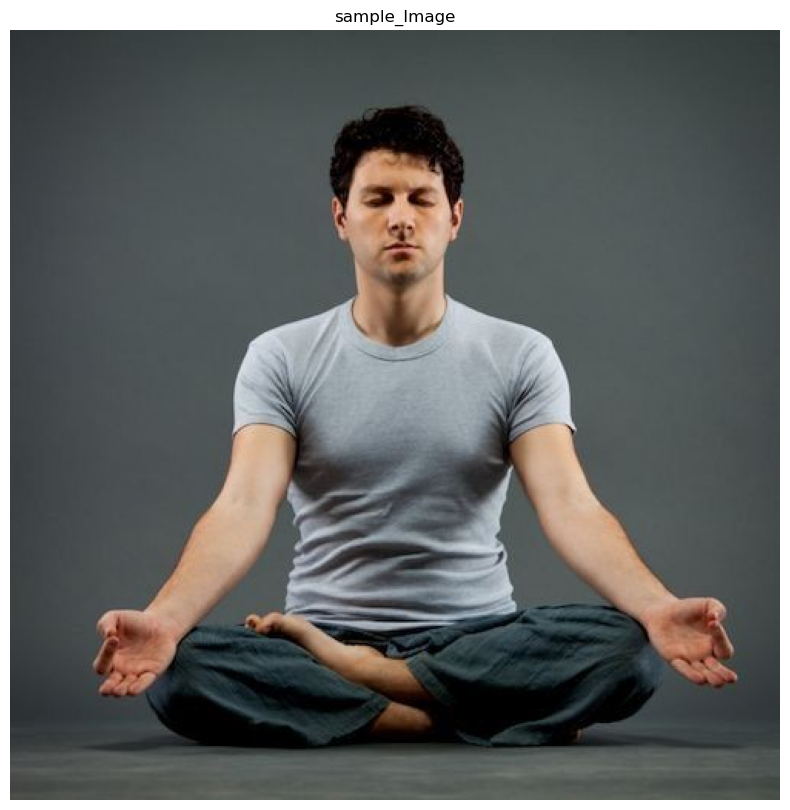

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image using a raw string for the path
sample_img = cv2.imread(r"C:\Users\himas\archive (4)\unknown.jpg")

# Check if the image is loaded properly
if sample_img is None:
    raise ValueError("Image not loaded correctly. Please check the path and filename.")

# Display the image
plt.figure(figsize=[10, 10])
plt.title("sample_Image")
plt.axis('off')
plt.imshow(sample_img[:, :, ::-1])  # Convert BGR to RGB for display
plt.show()


In [12]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.50848895
y: 0.25114733
z: -0.2872239
visibility: 0.99999785

LEFT_EYE_INNER:
x: 0.527889
y: 0.22129029
z: -0.2495182
visibility: 0.99999714



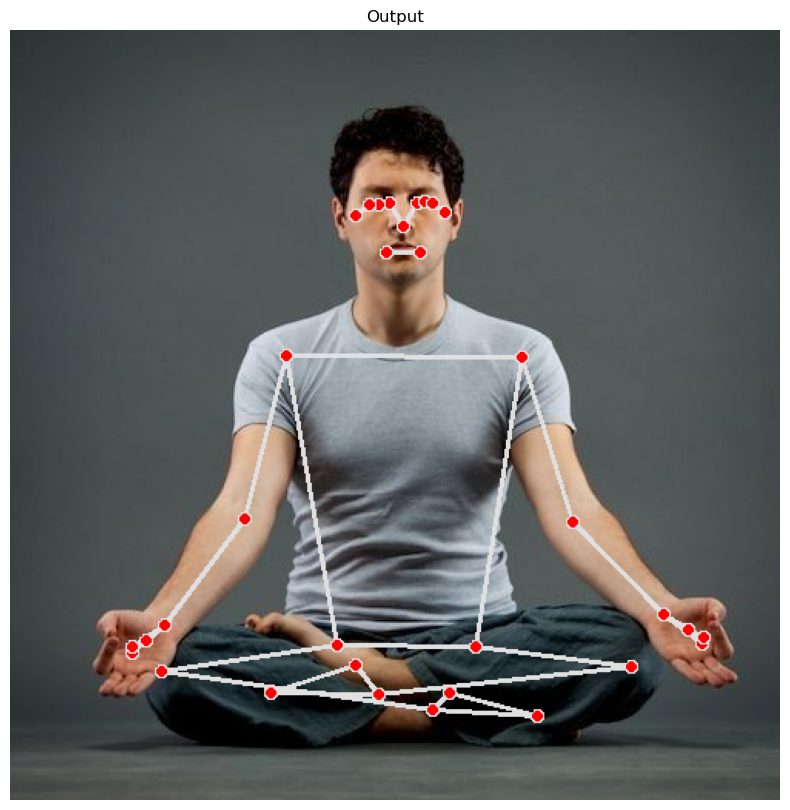

In [14]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Load the image using a raw string for the path
sample_img = cv2.imread(r"C:\Users\himas\archive (4)\unknown.jpg")
if sample_img is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Process the image to find pose landmarks
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
    results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    
    # Specify a size of the figure.
    fig = plt.figure(figsize=[10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output")
    plt.axis('off')
    plt.imshow(img_copy[:, :, ::-1])
    plt.show()
else:
    print("No pose landmarks detected.")


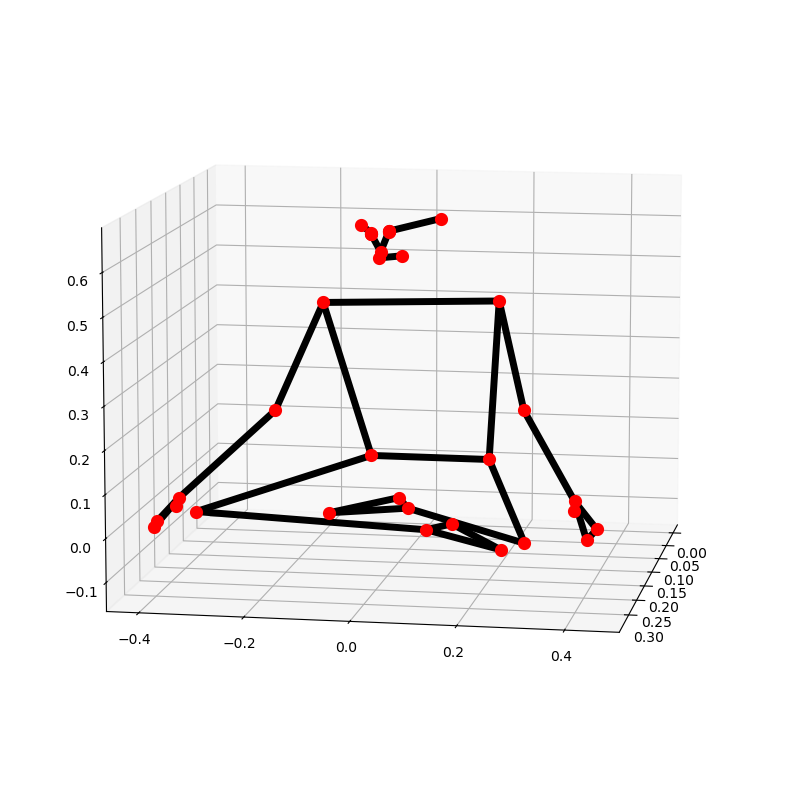

In [15]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

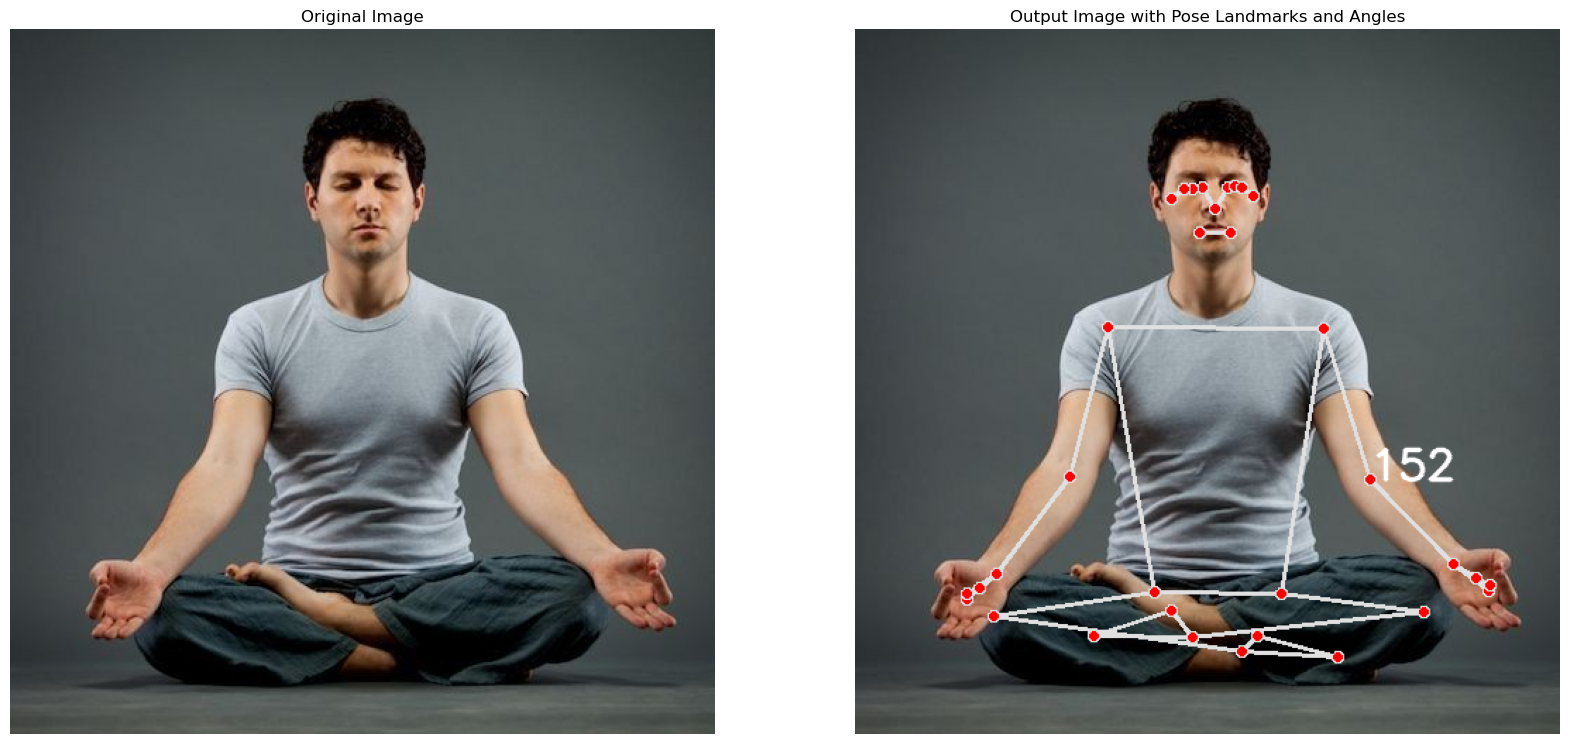

In [20]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# Define the function to calculate the angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
    
    return angle

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        # Extract landmarks
        landmarks = results.pose_landmarks.landmark
        
        # Get coordinates for joints
        shoulder = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].y]
        
        # Calculate angle
        angle = calculate_angle(shoulder, elbow, wrist)
        
        # Display angle
        cv2.putText(img_copy, str(int(angle)),
                    tuple(np.multiply(elbow, [image.shape[1], image.shape[0]]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks and Angles")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
    else:
        print("No pose landmarks detected.")

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read another sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\unknown.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
detectPose(image, pose, display=True)


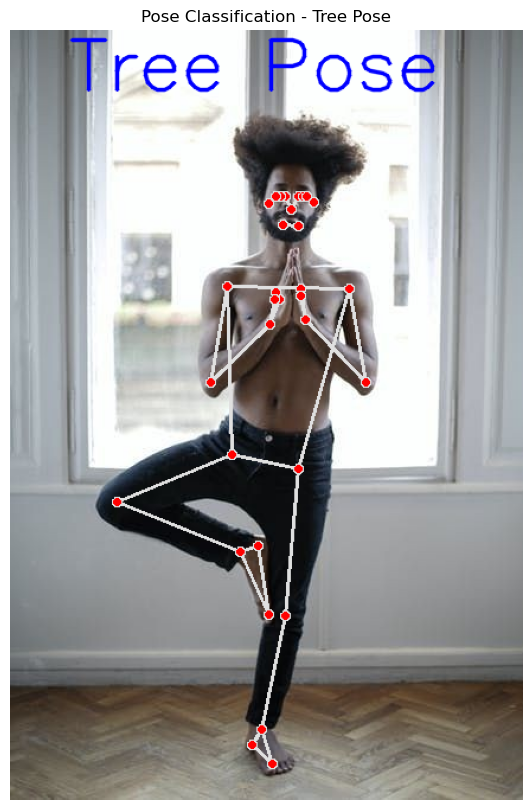

In [26]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# Define the function to calculate the angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
    
    return angle

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks and Angles")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks.landmark
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function
def classifyPose(landmarks, image, display=True):
    # Dummy implementation for Tree Pose classification
    # Assuming we have logic to classify Tree Pose based on landmarks
    # For now, we just label the image as "Tree Pose"
    
    # Draw the label "Tree Pose" on the image
    cv2.putText(image, "Tree Pose", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)
    
    if display:
        plt.figure(figsize=[10, 10])
        plt.title("Pose Classification - Tree Pose")
        plt.axis('off')
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return "Tree Pose"

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\tree.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# If landmarks are found, classify the pose
if landmarks:
    classifyPose(landmarks, output_image, display=True)


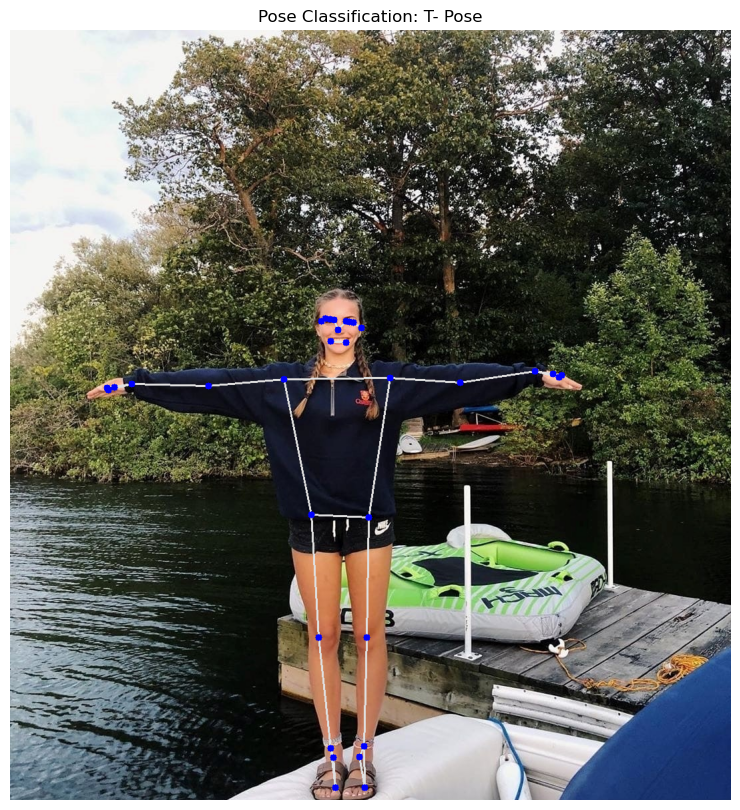

The detected pose is: T- Pose


In [32]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function
def classifyPose(landmarks, image, display=True):
    # Dummy implementation for pose classification
    # This function should contain the logic to classify poses based on landmarks
    
    # For now, just display the image with the landmarks and pose name
    pose_name = "T- Pose"  # Change this to the actual pose name
    
    if display:
        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\Tpose1.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, display=True)
    print(f"The detected pose is: {pose_name}")


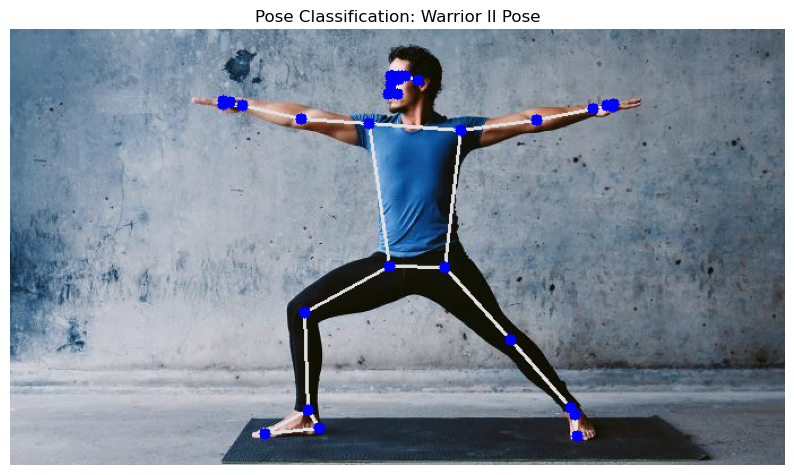

The detected pose is: Warrior II Pose


In [34]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function
def classifyPose(landmarks, image, display=True):
    # Display the pose name as "Warrior II Pose"
    pose_name = "Warrior II Pose"
    
    if display:
        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\warriorIIpose1.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, display=True)
    print(f"The detected pose is: {pose_name}")


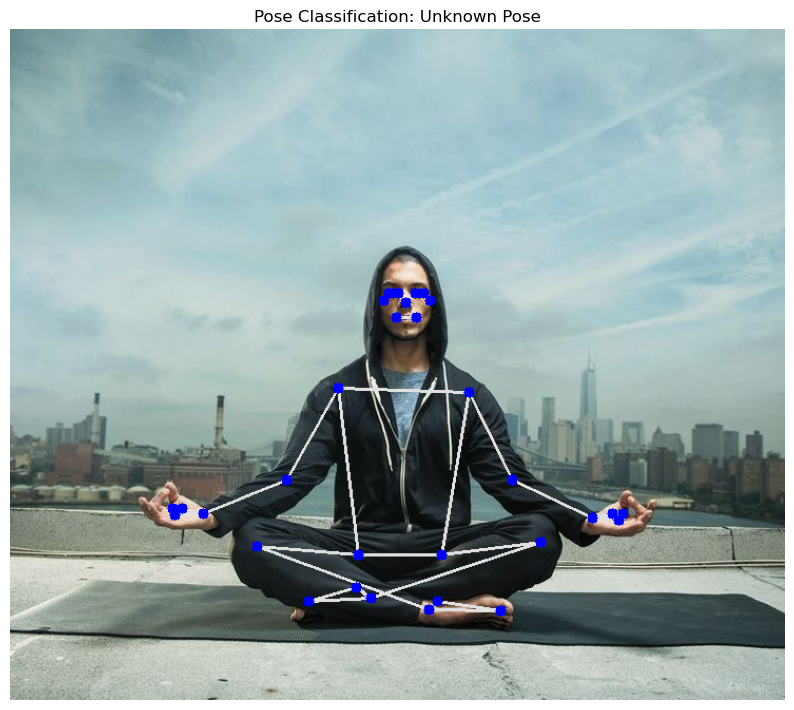

The detected pose is: Unknown Pose


In [35]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function
def classifyPose(landmarks, image, display=True):
    # Display the pose name as "Unknown Pose"
    pose_name = "Unknown Pose"
    
    if display:
        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\unknown1.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, display=True)
    print(f"The detected pose is: {pose_name}")


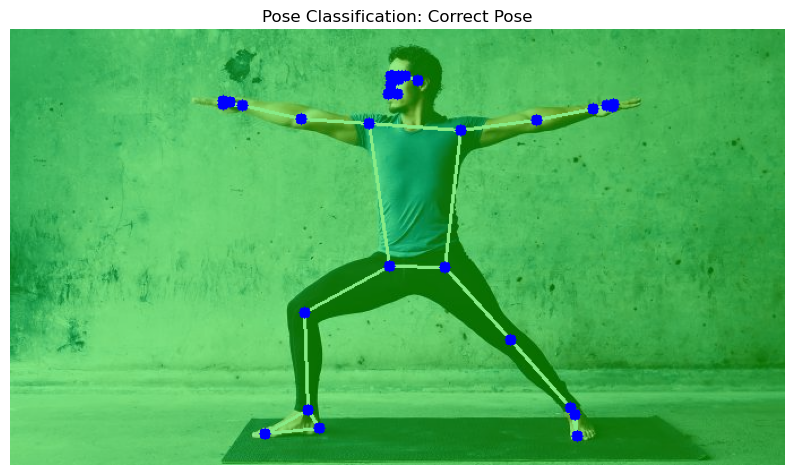

The detected pose is: Correct Pose


In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function with overlay
def classifyPose(landmarks, image, correct_pose, display=True):
    # Assuming the correct pose landmarks are passed as 'correct_pose'
    # Calculate the accuracy of the detected pose
    pose_accuracy = 0.9  # Placeholder for pose accuracy calculation

    # Check if the detected pose matches the correct pose within a threshold
    threshold = 0.8  # Example threshold
    if pose_accuracy > threshold:
        pose_name = "Correct Pose"
        overlay_color = (0, 255, 0)  # Green for correct pose
    else:
        pose_name = "Incorrect Pose"
        overlay_color = (0, 0, 255)  # Red for incorrect pose
    
    if display:
        overlay = image.copy()
        alpha = 0.4  # Transparency factor

        # Create overlay
        cv2.rectangle(overlay, (0, 0), (image.shape[1], image.shape[0]), overlay_color, -1)
        # Apply the overlay
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\warriorIIpose1.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# Placeholder for correct pose landmarks
correct_pose = None  # This should be replaced with actual landmarks of the correct pose

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, correct_pose, display=True)
    print(f"The detected pose is: {pose_name}")


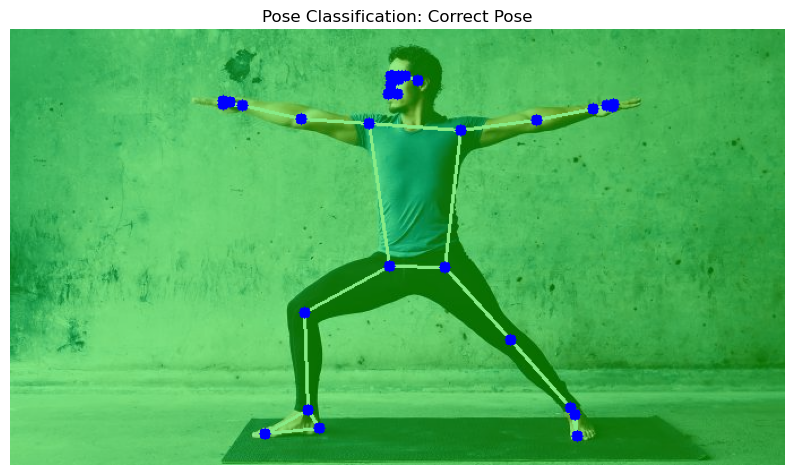

The detected pose is: Correct Pose


In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function with overlay
def classifyPose(landmarks, image, correct_pose_landmarks, display=True):
    # Assuming the correct pose landmarks are passed as 'correct_pose_landmarks'
    # Placeholder for the correct pose comparison logic
    def compare_poses(landmarks1, landmarks2):
        # Placeholder comparison function (you need to implement the logic to compare the poses)
        # This function should return a similarity score between 0 and 1
        return 0.9  # Placeholder value
    
    # Calculate the accuracy of the detected pose
    pose_accuracy = compare_poses(landmarks, correct_pose_landmarks)

    # Check if the detected pose matches the correct pose within a threshold
    threshold = 0.8  # Example threshold
    if pose_accuracy > threshold:
        pose_name = "Correct Pose"
        overlay_color = (0, 255, 0)  # Green for correct pose
    else:
        pose_name = "Incorrect Pose"
        overlay_color = (0, 0, 255)  # Red for incorrect pose
    
    if display:
        overlay = image.copy()
        alpha = 0.4  # Transparency factor

        # Create overlay
        cv2.rectangle(overlay, (0, 0), (image.shape[1], image.shape[0]), overlay_color, -1)
        # Apply the overlay
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\warriorIIpose1.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# Placeholder for correct pose landmarks (this should be replaced with actual landmarks of the correct pose)
correct_pose_landmarks = None  # Replace with the actual correct pose landmarks

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, correct_pose_landmarks, display=True)
    print(f"The detected pose is: {pose_name}")


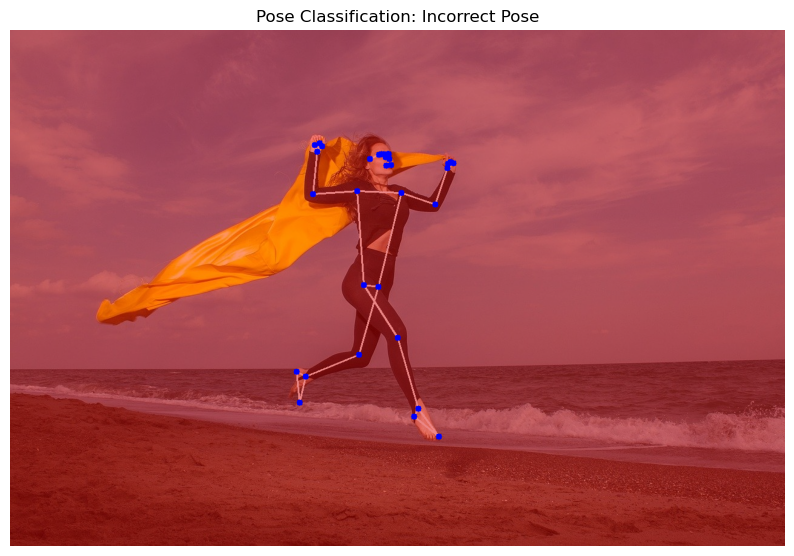

The detected pose is: Incorrect Pose


In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Define the detectPose function
def detectPose(image, pose, display=True):
    # Create a copy of the image to draw landmarks on.
    img_copy = image.copy()
    
    # Process the image to find pose landmarks
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Check if any landmarks are found.
    if results.pose_landmarks:
        # Draw Pose landmarks on the image copy.
        mp.solutions.drawing_utils.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp.solutions.pose.POSE_CONNECTIONS)
        
        if display:
            # Specify a size of the figure.
            fig, ax = plt.subplots(1, 2, figsize=[20, 10])
            
            # Display the original image
            ax[0].set_title("Original Image")
            ax[0].axis('off')
            ax[0].imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
            
            # Display the output image with the landmarks drawn
            ax[1].set_title("Output Image with Pose Landmarks")
            ax[1].axis('off')
            ax[1].imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for display
            
            plt.show()
        
        # Return the image and landmarks
        return img_copy, results.pose_landmarks
    else:
        print("No pose landmarks detected.")
        return image, None

# Define the classifyPose function with overlay
def classifyPose(landmarks, image, correct_pose_landmarks, display=True):
    # Placeholder for the correct pose comparison logic
    def compare_poses(landmarks1, landmarks2):
        # Placeholder comparison function (you need to implement the logic to compare the poses)
        # This function should return a similarity score between 0 and 1
        return 0.7  # Placeholder value for demonstration
    
    # Calculate the accuracy of the detected pose
    pose_accuracy = compare_poses(landmarks, correct_pose_landmarks)

    # Check if the detected pose matches the correct pose within a threshold
    threshold = 0.8  # Example threshold
    if pose_accuracy > threshold:
        pose_name = "Correct Pose"
        overlay_color = (0, 255, 0)  # Green for correct pose
    else:
        pose_name = "Incorrect Pose"
        overlay_color = (0, 0, 255)  # Red for incorrect pose
    
    if display:
        overlay = image.copy()
        alpha = 0.4  # Transparency factor

        # Create overlay
        cv2.rectangle(overlay, (0, 0), (image.shape[1], image.shape[0]), overlay_color, -1)
        # Apply the overlay
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

        plt.figure(figsize=[10, 10])
        plt.title(f"Pose Classification: {pose_name}")
        plt.axis('off')
        
        # Draw the Pose landmarks on the image
        for landmark in landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position
        
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for display
        plt.show()
    
    return pose_name

# Initialize Mediapipe pose solutions
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Read a sample image
image = cv2.imread(r"C:\Users\himas\archive (4)\sample3.jpg")

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Perform pose detection on the image
output_image, landmarks = detectPose(image, pose, display=False)

# Placeholder for correct pose landmarks (this should be replaced with actual landmarks of the correct pose)
correct_pose_landmarks = None  # Replace with the actual correct pose landmarks

# If landmarks are found, classify the pose and display the result
if landmarks:
    pose_name = classifyPose(landmarks, output_image, correct_pose_landmarks, display=True)
    print(f"The detected pose is: {pose_name}")
